In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [3]:
import tensorflow as tf 
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [55]:
train=pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [56]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [58]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [59]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [60]:
y_train_label = train.iloc[:,0]
y_test_label = test.iloc[:,0]

train = train.iloc[:,1:]
test = test.iloc[:,1:]

train_x = train.values
test_x = test.values
train_x

train_x = train_x - np.mean(train_x) / train_x.std()
test_x = test_x - np.mean(test_x) / train_x.std()

train_x = train_x.reshape(-1,28,28)
test_x = test_x.reshape(-1,28,28)

In [70]:
#expanding to 1 more dimensions
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [71]:
print(train_x.shape)
print(test_x.shape)
print(y_train_label.shape)
print(y_test_label.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)
(27455,)
(7172,)


In [72]:
type(train_x)

numpy.ndarray

Buidling and Training Model


In [73]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_5 (Dense)              (None, 26)               

In [74]:
# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [77]:
# Configure generators

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
  
# Configure generators

train_gen=train_datagen.flow(train_x,y_train_label,batch_size=64)

val_gen=validation_datagen.flow(test_x,y_test_label,batch_size=64)

In [78]:
#Train the Model 

history=model.fit_generator(
train_gen,epochs=20,
validation_data=val_gen)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
429/429 [==============================] - 18s 40ms/step - loss: 3.0037 - accuracy: 0.1063 - val_loss: 2.0089 - val_accuracy: 0.3784
Epoch 2/20
429/429 [==============================] - 17s 40ms/step - loss: 2.1986 - accuracy: 0.3076 - val_loss: 1.4004 - val_accuracy: 0.4948
Epoch 3/20
429/429 [==============================] - 17s 39ms/step - loss: 1.7541 - accuracy: 0.4398 - val_loss: 1.2788 - val_accuracy: 0.5452
Epoch 4/20
429/429 [==============================] - 17s 40ms/step - loss: 1.4650 - accuracy: 0.5254 - val_loss: 0.9655 - val_accuracy: 0.6383
Epoch 5/20
429/429 [==============================] - 17s 40ms/step - loss: 1.2457 - accuracy: 0.5936 - val_loss: 0.8582 - val_accuracy: 0.6820
Epoch 6/20
429/429 [==============================] - 19s 44ms/step - loss: 1.0989 - accuracy: 0.6416 - val_loss: 0.7674 - val_accuracy: 0.7228
Epoch 7/20
429/429 [==============================] - 19s 44ms/step - loss: 0.9818 - accuracy: 0.6808 - val_loss: 0.6077 - val_accuracy:

In [81]:
model.evaluate(test_x,
y_test_label)

225/225 [==============================] - 1s 6ms/step - loss: 193.8979 - accuracy: 0.6474


[193.89791870117188, 0.64737868309021]

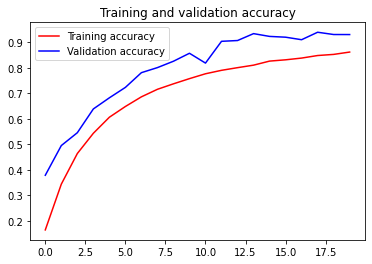

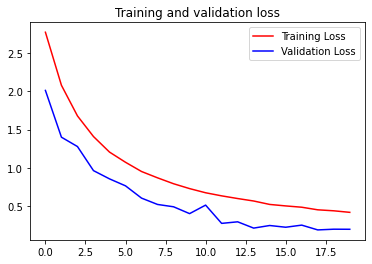

In [83]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()